In [ ]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='baad81bb-9eb6-496c-9b02-f3bc821914e4', project_access_token='p-ef033d7e8047485cb6ca3acd7daa88fb91a307d2')
pc = project.project_context


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f12a51438bc642a79bc2106305bc59b6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='fI1zfa6XDoWtqPoAfp5F6vLeUfZbB2-rVO9dcL25wvFA',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_f12a51438bc642a79bc2106305bc59b6.get_object(Bucket='lifeexpectancywithpython-donotdelete-pr-v6llvbwqsr036r',Key='datasets_12603_17232_Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


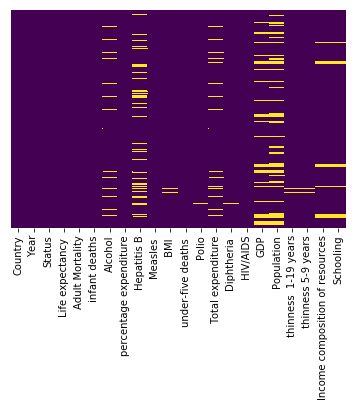


 (2938, 22)

 Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatiti

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


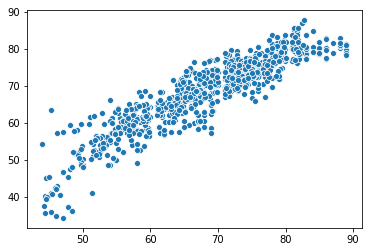

In [16]:
#visulation with graphs using seaborn
class Visulation:
    def HeatMap(self,data):
        sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
        plt.show()
    
    def LRScatterGraph(self,y_test,prediction):
        sns.scatterplot(x=y_test,y=prediction)
        plt.show()
   
#Dataset Anylasis
def Anylasis(data):
    print('\n',data.shape)
    print('\n',data.columns)
    print('\n',data.info())
    print('\n',data.corr())
    print('\n',data.isnull().sum(axis=0))

#Removing Null Values
def NullFilter(data):
    data_before_drop = data.shape[0]
    data = data.dropna()
    data_after_drop = data.shape[0]
    print('\nTotal Rows before drop: ',data_before_drop)
    print('Total Rows after drop: ', data_after_drop)
    return data

#Encoding Categorical Data
def DataEncoding(data):
    from sklearn.preprocessing import LabelEncoder
    lb = LabelEncoder()
    data['Status'] = lb.fit_transform(data['Status'])
    return data

#Multiple Linear regression Function
def Linear_regression(X,y):
    #Splitting Dataset into train and test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.6,random_state=77)
    
    #Multiple Linear Regression using scikit-learn library
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train,y_train)

    #Predection
    y_prediction = lr.predict(X_test)

    # accuracy and error
    from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
    print('\naccuracy(R^2): {}%'.format(lr.score(X_test, y_test)*100))
    print('\nmae: {}'.format(mean_absolute_error(y_test, y_prediction)))
    print('\nrmse: {}'.format(np.sqrt(mean_squared_error(y_test, y_prediction))))

    #Scatter graph to analyse your predicted values
    v1.LRScatterGraph(y_test,y_prediction)

if __name__ == "__main__":
    #Reading Dataset
    v1 = Visulation()
    
    #Use Heatmap graph to analyle null values
    v1.HeatMap(df_data_1)

    Anylasis(df_data_1)
    
    dataset = NullFilter(df_data_1)

    dataset = DataEncoding(dataset)

    #delecting non numering columns
    dataset = dataset.drop(['Country'], axis=1)
    X = dataset.drop(['Life expectancy '], axis=1).values
    y = dataset['Life expectancy '].values
    Linear_regression(X,y)

In [17]:
# Replace the credentials that you got from Watson Machine Learning service
from watson_machine_learning_client import WatsonMachineLearningAPIClient
wml_credentials = {
    "apikey": "3LM4EAo5w0L--VdoVwHMwbuFQSupmV70vWOyXPIAqPJX",
    "instance_id": "50028aae-4c5e-4c64-93d1-3c5f07b07ef4",
    "url": "https://eu-gb.ml.cloud.ibm.com"
}

client = WatsonMachineLearningAPIClient(wml_credentials)

In [18]:
runtimes_meta = {
    client.runtimes.ConfigurationMetaNames.NAME: "Life_expectancy_model", 
    client.runtimes.ConfigurationMetaNames.DESCRIPTION: "Life expectancy calculation", 
    client.runtimes.ConfigurationMetaNames.PLATFORM: { "name": "python", "version": "3.6" }, 
}
runtime_details = client.runtimes.store(runtimes_meta)
runtime_details
runtime_url = client.runtimes.get_url(runtime_details)
runtime_uid = client.runtimes.get_uid(runtime_details)
print("Runtimes URL: " + runtime_url)
print("Runtimes UID: " + runtime_uid)

Runtimes URL: https://eu-gb.ml.cloud.ibm.com/v4/runtimes/2790c510-7676-452b-b199-031eb38c51b0
Runtimes UID: 2790c510-7676-452b-b199-031eb38c51b0


In [19]:
model_props = {client.repository.ModelMetaNames.NAME: "Life expectancy model",
               client.repository.ModelMetaNames.RUNTIME_UID: runtime_uid
              }
published_model = client.repository.store_model(model=model, meta_props=model_props)
import json
published_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_uid)
print(json.dumps(model_details, indent=2))

{
  "metadata": {
    "guid": "3aa96bef-45b8-4e97-90ab-e91c8461bfe0",
    "url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/50028aae-4c5e-4c64-93d1-3c5f07b07ef4/published_models/3aa96bef-45b8-4e97-90ab-e91c8461bfe0",
    "created_at": "2020-07-01T07:12:19.765Z",
    "modified_at": "2020-07-01T07:12:19.812Z"
  },
  "entity": {
    "runtime_environment": "python-3.6",
    "learning_configuration_url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/50028aae-4c5e-4c64-93d1-3c5f07b07ef4/published_models/3aa96bef-45b8-4e97-90ab-e91c8461bfe0/learning_configuration",
    "name": "Life expectancy model",
    "learning_iterations_url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/50028aae-4c5e-4c64-93d1-3c5f07b07ef4/published_models/3aa96bef-45b8-4e97-90ab-e91c8461bfe0/learning_iterations",
    "feedback_url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/50028aae-4c5e-4c64-93d1-3c5f07b07ef4/published_models/3aa96bef-45b8-4e97-90ab-e91c8461bfe0/feedback",
    "latest_version": {
 

In [20]:
created_deployment = client.deployments.create(published_model_uid, name="Life_expectancy_model")



#######################################################################################

Synchronous deployment creation for uid: '3aa96bef-45b8-4e97-90ab-e91c8461bfe0' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='8e062eb1-f9d6-441f-8eb9-8bbe6f1a911b'
------------------------------------------------------------------------------------------------




In [21]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
print(scoring_endpoint)
x_train.iloc[0].values


https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/50028aae-4c5e-4c64-93d1-3c5f07b07ef4/deployments/8e062eb1-f9d6-441f-8eb9-8bbe6f1a911b/online


array([  15,   88,    1, 1227,    0,   69,   39,  547,    1,   50,  968,
         63,    0,  917, 1623,   48,   48,  447,  104])